In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

data_path = '/content/drive/MyDrive/Colab Notebooks/MBA.csv'
mba_df = pd.read_csv(data_path)

mba_df = mba_df.drop(columns=['application_id'])

mba_df['gender'] = mba_df['gender'].map({'Male': 1, 'Female': 0})

mba_df['admission'] = mba_df['admission'].apply(lambda x: 1 if x == 'Admit' else 0)

print(mba_df.head())


   gender  international   gpa       major      race   gmat  work_exp  \
0       0          False  3.30    Business     Asian  620.0       3.0   
1       1          False  3.28  Humanities     Black  680.0       5.0   
2       0           True  3.30    Business       NaN  710.0       5.0   
3       1          False  3.47        STEM     Black  690.0       6.0   
4       1          False  3.35        STEM  Hispanic  590.0       5.0   

           work_industry  admission  
0     Financial Services          1  
1  Investment Management          0  
2             Technology          1  
3             Technology          0  
4             Consulting          0  


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoders = {}
categorical_columns = ['major', 'race', 'work_industry']

for column in categorical_columns:
    le = LabelEncoder()
    mba_df[column] = le.fit_transform(mba_df[column].astype(str))
    label_encoders[column] = le

X = mba_df.drop(columns=['admission'])
y = mba_df['admission']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("X_train:", X_train[:5])
print("y_train:", y_train[:5])
print("X_test:", X_test[:5])
print("y_test:", y_test[:5])


X_train: [[ 7.58958373e-01 -6.51352320e-01  1.58106215e+00 -1.29704971e+00
   5.80016093e-01 -2.22540297e-01 -2.13657141e-02  6.89329323e-01]
 [-1.31759532e+00 -6.51352320e-01  1.71347426e+00  1.83495310e-03
   6.58873380e-02  7.91891325e-01 -9.92623633e-01 -1.19984479e+00]
 [-1.31759532e+00 -6.51352320e-01  1.18382579e+00  1.30071961e+00
  -1.47649893e+00  1.83232352e-01 -9.92623633e-01 -1.19984479e+00]
 [-1.31759532e+00  1.53526743e+00 -7.88326432e-03  1.83495310e-03
   1.09414485e+00  3.86118676e-01 -1.96388155e+00 -1.19984479e+00]
 [ 7.58958373e-01 -6.51352320e-01 -6.03737794e-01 -1.29704971e+00
  -1.47649893e+00 -2.22540297e-01 -2.13657141e-02  1.39776962e+00]]
y_train: 6189    0
711     1
3954    1
1020    1
5726    0
Name: admission, dtype: int64
X_test: [[ 7.58958373e-01 -6.51352320e-01  1.51485609e+00  1.83495310e-03
   5.80016093e-01 -4.25426622e-01 -2.13657141e-02  4.53182559e-01]
 [ 7.58958373e-01 -6.51352320e-01  1.24528853e-01 -1.29704971e+00
   5.80016093e-01 -8.31199271

Best parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best cross-validation accuracy: 0.8579212916246217
Confusion Matrix:
[[1043    0]
 [ 196    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1043
           1       0.00      0.00      0.00       196

    accuracy                           0.84      1239
   macro avg       0.42      0.50      0.46      1239
weighted avg       0.71      0.84      0.77      1239



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


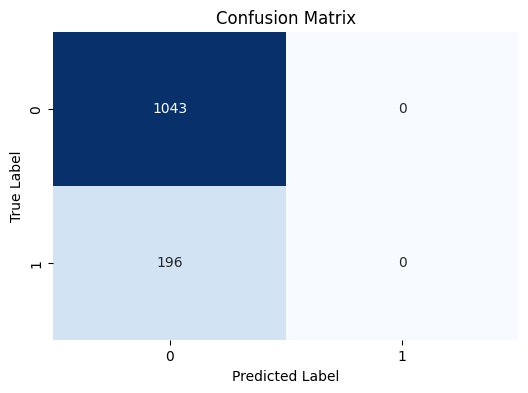

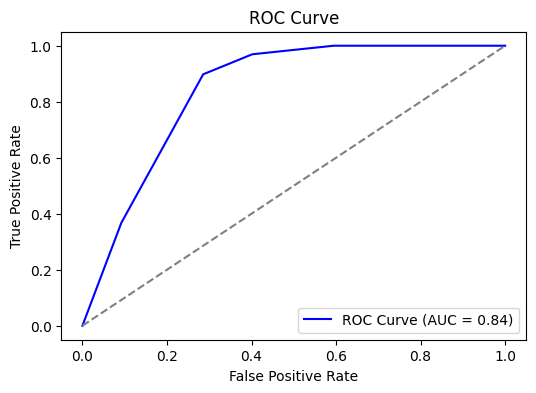

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

y_pred = best_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

y_pred_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
